# SOCIAL MEDIA VS PRODUCTIVITY

This dataset captures individual-level information related to demographics, social media habits, work behavior, and digital well-being. Below is a brief description of each column:

- **age**: Participant's age.
- **gender**: Gender identity.
- **job_type**: Employment status or occupation.
- **daily_social_media_time**: Hours spent on social media per day.
- **social_platform_preference**: Most used or preferred social platform.
- **number_of_notifications**: Daily average number of notifications received.
- **work_hours_per_day**: Daily working hours.
- **perceived_productivity_score**: Self-rated productivity score.
- **actual_productivity_score**: Measured or externally assessed productivity.
- **stress_level**: Reported stress level.
- **sleep_hours**: Average nightly sleep duration.
- **screen_time_before_sleep**: Screen time before sleep (in hours).
- **breaks_during_work**: Number of work breaks per day.
- **uses_focus_apps**: Whether focus/productivity apps are used (True/False).
- **has_digital_wellbeing_enabled**: Whether digital wellbeing features are enabled (True/False).
- **coffee_consumption_per_day**: Daily coffee intake (cups).
- **days_feeling_burnout_per_month**: Monthly frequency of burnout days.
- **weekly_offline_hours**: Hours spent offline per week.
- **job_satisfaction_score**: Self-rated job satisfaction score.

This structured data supports analysis of how digital habits and work-life balance impact productivity and well-being.

In [1]:
!pip install -q --upgrade google-cloud-bigquery pandas-gbq google-cloud-bigquery-storage bigquery-magics

In [2]:
%load_ext bigquery_magics

In [3]:
import os
from google.cloud import bigquery
from google.cloud import storage
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:\\Users\\LENOVO\\Desktop\\Università\\DATA SCIENCE\\Cloud Computing & BigData\\project_CC\\ccbd-exam-2025-leonardi-2cb424d0b814.json"

client = bigquery.Client(project="ccbd-exam-2025-leonardi")

In [4]:
%%capture
%%bigquery df 
SELECT *
FROM `ccbd-exam-2025-leonardi.social_media_vs_productivity.productivity_data`

In [5]:
df.head(5)

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,18,Female,Student,1.572809,Twitter,54,6.424105,7.922042,7.191692,3.0,4.005938,0.309339,7,True,False,2,0,13.715483,7.772842
1,18,Female,Student,3.898538,Facebook,54,3.819271,3.675954,2.579505,10.0,7.406879,1.680079,8,False,False,0,0,14.963448,2.056963
2,18,Male,Unemployed,0.444768,Instagram,64,7.967439,5.058437,4.302344,1.0,NaN,2.049765,4,False,True,0,0,32.218338,6.433677
3,18,Male,IT,3.916889,Instagram,59,8.339486,2.096601,1.813856,5.0,7.639024,1.459525,6,False,False,1,0,22.205752,NaN
4,18,Male,Student,2.420757,Instagram,66,7.542464,NaN,2.555823,8.0,6.498614,1.467678,2,True,True,2,0,0.000000,1.137740


In [6]:
type(df)

pandas.core.frame.DataFrame

## Productivity by Job Type

**Objective**:  
This query analyzes how perceived and actual productivity vary across different job types.

**How it works**:  
- It selects the average *perceived* and *actual* productivity scores for each `job_type`.
- It also counts the number of individuals in each group (`num_people`).
- Results are grouped by job type and ordered by descending actual productivity.

**Goal**:  
To compare how people in different professions perceive their productivity versus how it is objectively measured, helping to identify potential mismatches or trends.

**Results Summary**:  
- People in **IT** report the highest actual productivity (5.01), followed by the **Unemployed** (4.99) and **Finance** professionals (4.97).
- Across all job types, perceived productivity is slightly higher than actual productivity.
- The differences are relatively small, suggesting consistent self-assessment across professions.

This insight can support further analysis on work habits and the role of employment context in productivity.


In [24]:
from google.cloud import bigquery

q = """
SELECT
  job_type,
  AVG(perceived_productivity_score) AS avg_perceived,
  AVG(actual_productivity_score) AS avg_actual,
  COUNT(*) AS num_people
FROM
  `ccbd-exam-2025-leonardi.social_media_vs_productivity.productivity_data`
GROUP BY job_type
ORDER BY avg_actual DESC
"""

res = client.query(q).to_dataframe()

In [25]:
res

,job_type,avg_perceived,avg_actual,num_people
0,IT,5.561552,5.007447,5026
1,Unemployed,5.541885,4.985443,4958
2,Finance,5.507428,4.965829,5017
3,Education,5.489487,4.925198,5055
4,Health,5.483341,4.922816,4932
5,Student,5.479340,4.904264,5012


In [7]:
%%capture
%%bigquery query
SELECT
  job_type,
  AVG(perceived_productivity_score) AS avg_perceived,
  AVG(actual_productivity_score) AS avg_actual,
  COUNT(*) AS num_people
FROM
  `ccbd-exam-2025-leonardi.social_media_vs_productivity.productivity_data`
GROUP BY job_type
ORDER BY avg_actual DESC

In [8]:
table_md = query.to_markdown(index=False)
display(Markdown(f"<div align='center'>\n\n{table_md}\n\n</div>"))

<div align='center'>

| job_type   |   avg_perceived |   avg_actual |   num_people |
|:-----------|----------------:|-------------:|-------------:|
| IT         |         5.56155 |      5.00745 |         5026 |
| Unemployed |         5.54189 |      4.98544 |         4958 |
| Finance    |         5.50743 |      4.96583 |         5017 |
| Education  |         5.48949 |      4.9252  |         5055 |
| Health     |         5.48334 |      4.92282 |         4932 |
| Student    |         5.47934 |      4.90426 |         5012 |

</div>

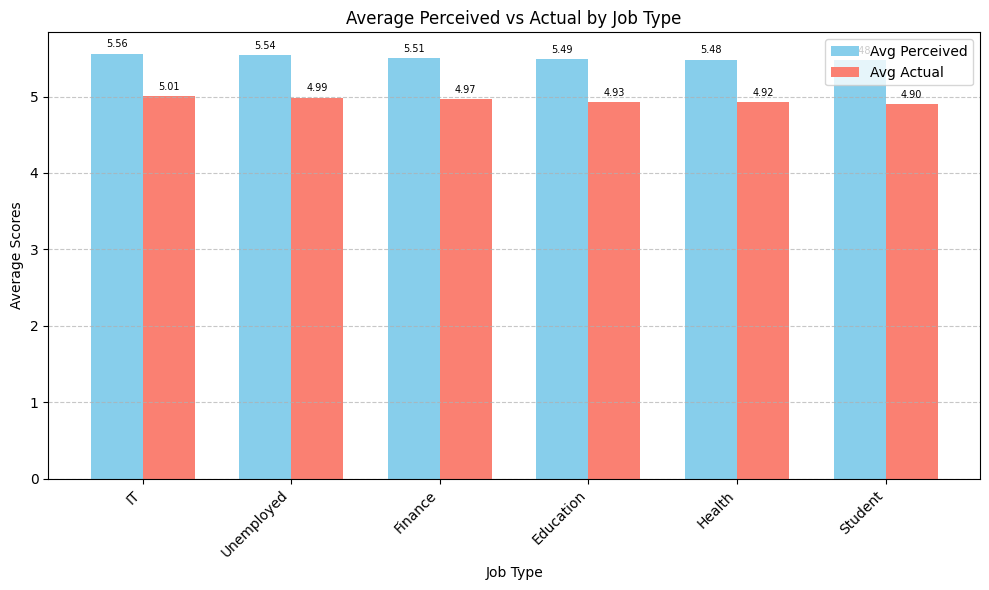

In [9]:
job_types = query['job_type']
avg_perceived = query['avg_perceived']
avg_actual = query['avg_actual']
    
x = np.arange(len(job_types))
width = 0.35
    
fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, avg_perceived, width, label='Avg Perceived', color='skyblue')
bars2 = ax.bar(x + width/2, avg_actual, width, label='Avg Actual', color='salmon')
    
ax.set_xlabel('Job Type')
ax.set_ylabel('Average Scores')
ax.set_title('Average Perceived vs Actual by Job Type')
ax.set_xticks(x)
ax.set_xticklabels(job_types, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # spostamento verticale
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=7)
    
plt.tight_layout()
plt.show()

## Social Platform Preferences

**Objective**:  
To identify the most popular social media platforms among users in the dataset.

**How it works**:  
- The query counts how many users prefer each `social_platform_preference`.
- It groups the data by platform and sorts the result in descending order of user count.

**Goal**:  
To understand user distribution across platforms, which can help analyze platform-specific behaviors or impacts on productivity.

**Results Summary**:  
- **TikTok** is the most preferred platform with 6,096 users, followed by **Telegram** (6,013) and **Instagram** (6,006).
- **Twitter** and **Facebook** also have substantial user bases but slightly lower numbers.

These figures suggest TikTok leads in popularity among participants, which could have implications for digital behavior patterns and time use.


In [10]:
%%capture
%%bigquery query2
SELECT 
  social_platform_preference AS platform, COUNT(*) AS total_users
FROM 
  `ccbd-exam-2025-leonardi.social_media_vs_productivity.productivity_data`
GROUP BY platform
ORDER BY total_users DESC

In [11]:
table_md = query2.to_markdown(index=False)
display(Markdown(f"<div align='center'>\n\n{table_md}\n\n</div>"))

<div align='center'>

| platform   |   total_users |
|:-----------|--------------:|
| TikTok     |          6096 |
| Telegram   |          6013 |
| Instagram  |          6006 |
| Twitter    |          5964 |
| Facebook   |          5921 |

</div>

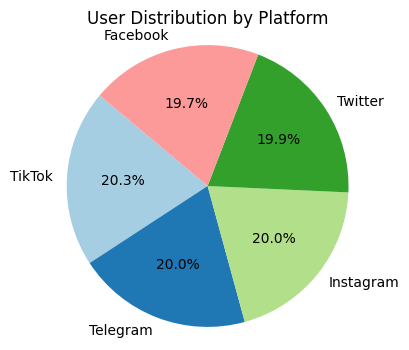

In [12]:
plt.figure(figsize=(4,4))
plt.pie(query2['total_users'], labels=query2['platform'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('User Distribution by Platform')
plt.axis('equal')
plt.show()

## Social Media Time by Age Group

**Objective**:  
To examine how daily social media usage varies across different age groups.

**How it works**:  
- Ages are grouped into predefined ranges (e.g., 18–24, 25–34).
- The average daily time spent on social media is calculated for each group.

**Goal**:  
To identify age-based patterns in social media usage.

**Results Summary**:  
- All age groups spend roughly 3.1 hours per day on social media.
- The **35–44** group shows slightly higher usage (3.16 hours), while the **55+** group has the lowest (3.08).

This suggests relatively consistent usage across age ranges, with minor differences.


In [13]:
%%capture
%%bigquery query3
SELECT
  CASE
    WHEN age < 18 THEN 'Under 18'
    WHEN age BETWEEN 18 AND 24 THEN '18-24'
    WHEN age BETWEEN 25 AND 34 THEN '25-34'
    WHEN age BETWEEN 35 AND 44 THEN '35-44'
    WHEN age BETWEEN 45 AND 54 THEN '45-54'
    ELSE '55+'
  END AS age_group,
  ROUND(AVG(daily_social_media_time), 2) AS avg_time_spent
FROM `ccbd-exam-2025-leonardi.social_media_vs_productivity.productivity_data`
GROUP BY age_group
ORDER BY age_group

In [14]:
table_md = query3.to_markdown(index=False)
display(Markdown(f"<div align='center'>\n\n{table_md}\n\n</div>"))

<div align='center'>

| age_group   |   avg_time_spent |
|:------------|-----------------:|
| 18-24       |             3.14 |
| 25-34       |             3.09 |
| 35-44       |             3.16 |
| 45-54       |             3.11 |
| 55+         |             3.08 |

</div>

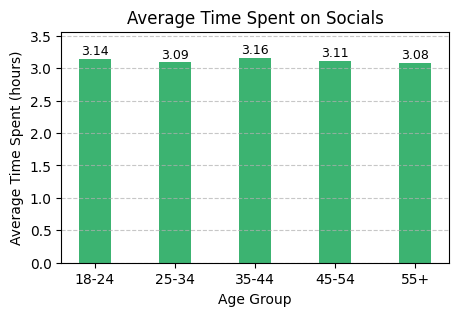

In [15]:
plt.figure(figsize=(5,3))
bars = plt.bar(query3['age_group'], query3['avg_time_spent'], color='mediumseagreen', width=0.4)

plt.xlabel('Age Group')
plt.ylabel('Average Time Spent (hours)')
plt.title('Average Time Spent on Socials')
plt.ylim(0, max(query3['avg_time_spent']) + 0.4)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()

## Social Media Time by Productivity Level

**Objective**:  
To explore the relationship between actual productivity and social media usage.

**How it works**:  
- Users are categorized into productivity levels (High, Medium, Low) based on their `actual_productivity_score`.
- The average daily social media time is calculated for each group.

**Goal**:  
To assess whether higher productivity correlates with less time on social media.

**Results Summary**:  
- Surprisingly, the **High productivity** group spends the most time on social media (3.17 hours).
- The **Medium** group spends the least (3.09 hours), with **Low** productivity users slightly higher (3.13).

These results challenge assumptions and suggest that social media time alone may not directly impact productivity.


In [16]:
%%capture
%%bigquery query4
SELECT
  CASE
    WHEN actual_productivity_score >= 8 THEN 'High'
    WHEN actual_productivity_score >= 5 THEN 'Medium'
    ELSE 'Low'
  END AS productivity_level,
  ROUND(AVG(daily_social_media_time), 2) AS avg_time_social
FROM `ccbd-exam-2025-leonardi.social_media_vs_productivity.productivity_data`
GROUP BY productivity_level
ORDER BY avg_time_social DESC

In [17]:
table_md = query4.to_markdown(index=False)
display(Markdown(f"<div align='center'>\n\n{table_md}\n\n</div>"))

<div align='center'>

| productivity_level   |   avg_time_social |
|:---------------------|------------------:|
| High                 |              3.17 |
| Low                  |              3.13 |
| Medium               |              3.09 |

</div>

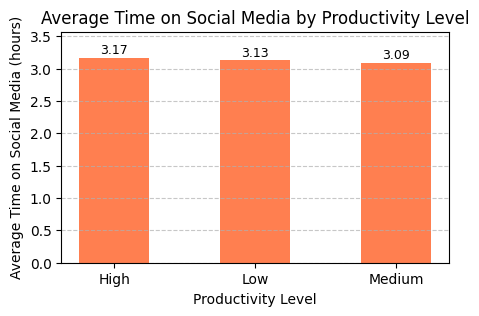

In [18]:
plt.figure(figsize=(5,3))
plt.bar(query4['productivity_level'], query4['avg_time_social'], color='coral', width=0.5)
plt.xlabel('Productivity Level')
plt.ylabel('Average Time on Social Media (hours)')
plt.title('Average Time on Social Media by Productivity Level')
plt.ylim(0, max(query4['avg_time_social']) + 0.4)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, val in enumerate(query4['avg_time_social']):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()

## Function Overview: Exporting BigQuery Results to GCS

This code defines two helper functions to run a BigQuery query and export its result as a file to Google Cloud Storage (GCS).

**1. `ensure_dataset_exists(dataset_name)`**  
Ensures that a temporary dataset exists in the project. If not, it creates one in the **EU** location.

**2. `save_query_result_to_gcs(query, destination_uri)`**  
- Creates the temp dataset (if needed).
- Parses the GCS path (`gs://bucket/path/file.csv`).
- Deletes any existing blob at the target path to allow overwrite.
- Executes the BigQuery query and saves the result in a temporary table.
- Exports that table to GCS in the specified location.
- Deletes the temporary dataset after the export.

This approach is useful for automating data exports from BigQuery to GCS as part of a data pipeline or for external analysis.

In [19]:
def ensure_dataset_exists(dataset_name):
    dataset_id = f"{client.project}.{dataset_name}"
    try:
        client.get_dataset(dataset_id)
    except Exception:
        dataset = bigquery.Dataset(dataset_id)
        dataset.location = "EU"
        client.create_dataset(dataset)

def save_query_result_to_gcs(query, destination_uri):
    dataset_name = "temp_dataset"
    ensure_dataset_exists(dataset_name)

    # Parsing bucket and blob path
    path_parts = destination_uri.replace("gs://", "").split("/", 1)
    bucket_name = path_parts[0]
    blob_path = path_parts[1]

    # Initialize storage client
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(blob_path)

    # If blob exists, delete it to allow overwrite
    if blob.exists():
        print(f"⚠️ File {destination_uri} already exists. Overwriting.")
        blob.delete()

    # Run BigQuery job with temp table
    job_config = bigquery.QueryJobConfig(
        destination=client.dataset(dataset_name).table("temp_table"),
        write_disposition="WRITE_TRUNCATE"
    )

    query_job = client.query(query, job_config=job_config)
    query_job.result()

    # Export to GCS
    destination_table = query_job.destination
    extract_job = client.extract_table(
        destination_table,
        destination_uri,
        location="EU"
    )
    extract_job.result()
    print(f"✅ Results saved in {destination_uri}")

    # Delete the temp dataset
    client.delete_dataset(f"{client.project}.{dataset_name}", delete_contents=True, not_found_ok=True)

In [20]:
query = """
SELECT
  job_type,
  AVG(perceived_productivity_score) AS avg_perceived,
  AVG(actual_productivity_score) AS avg_actual,
  COUNT(*) AS num_people
FROM
  `ccbd-exam-2025-leonardi.social_media_vs_productivity.productivity_data`
GROUP BY job_type
ORDER BY avg_actual DESC
"""

query2 = """
SELECT social_platform_preference AS platform, COUNT(*) AS total_users
FROM `ccbd-exam-2025-leonardi.social_media_vs_productivity.productivity_data`
GROUP BY platform
ORDER BY total_users DESC
"""

query3 = """
SELECT
  CASE
    WHEN age < 18 THEN 'Under 18'
    WHEN age BETWEEN 18 AND 24 THEN '18-24'
    WHEN age BETWEEN 25 AND 34 THEN '25-34'
    WHEN age BETWEEN 35 AND 44 THEN '35-44'
    WHEN age BETWEEN 45 AND 54 THEN '45-54'
    ELSE '55+'
  END AS age_group,
  ROUND(AVG(daily_social_media_time), 2) AS avg_time_spent
FROM `ccbd-exam-2025-leonardi.social_media_vs_productivity.productivity_data`
GROUP BY age_group
ORDER BY age_group
"""

query4 = """
SELECT
  CASE
    WHEN actual_productivity_score >= 8 THEN 'High'
    WHEN actual_productivity_score >= 5 THEN 'Medium'
    ELSE 'Low'
  END AS productivity_level,
  ROUND(AVG(daily_social_media_time), 2) AS avg_time_social
FROM `ccbd-exam-2025-leonardi.social_media_vs_productivity.productivity_data`
GROUP BY productivity_level
ORDER BY avg_time_social DESC
"""

In [21]:
save_query_result_to_gcs(query, "gs://exam-gl-bucket/JL1.csv")
save_query_result_to_gcs(query2, "gs://exam-gl-bucket/JL2.csv")
save_query_result_to_gcs(query3, "gs://exam-gl-bucket/JL3.csv")
save_query_result_to_gcs(query4, "gs://exam-gl-bucket/JL4.csv")

⚠️ File gs://exam-gl-bucket/JL1.csv already exists. Overwriting.
✅ Results saved in gs://exam-gl-bucket/JL1.csv
⚠️ File gs://exam-gl-bucket/JL2.csv already exists. Overwriting.
✅ Results saved in gs://exam-gl-bucket/JL2.csv
⚠️ File gs://exam-gl-bucket/JL3.csv already exists. Overwriting.
✅ Results saved in gs://exam-gl-bucket/JL3.csv
⚠️ File gs://exam-gl-bucket/JL4.csv already exists. Overwriting.
✅ Results saved in gs://exam-gl-bucket/JL4.csv
